In [1]:
# 주택 가격 예측: 회귀분석
# 회귀분석 : 연속적인 값을 예측

# 보스턴 주택 가격 데이터셋
# 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터로 주택 가격 예측
# 샘플 개수 : 506개(학습용 404개, 검증용 102개)

from keras.datasets import boston_housing

# c:/사용자/본인계정/.keras/datasets 디렉토리에 다운로드됨
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [2]:
#학습용 404개, 검증용 102개, 13개의 변수

print(X_train.shape)
print(X_train.shape[1])

(404, 13)
13


In [3]:
X_test
X_test.shape

(102, 13)

In [4]:
# 종속변수 : 주택의 가격(천달러 단위)
# 주택가격(10000~50000달러, 1970년대 중반 가격)
y_train[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

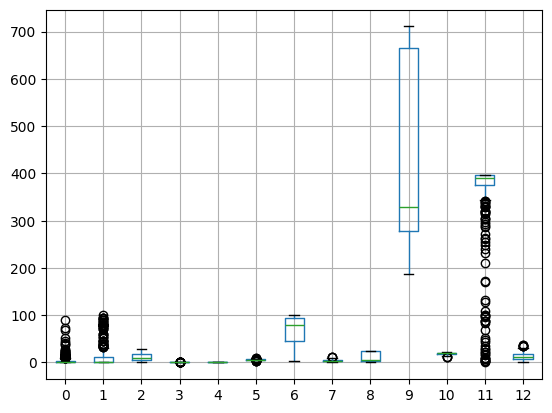

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(X_train).boxplot()

plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 평균 0, 표준편차 1로 만드는 스케일러
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

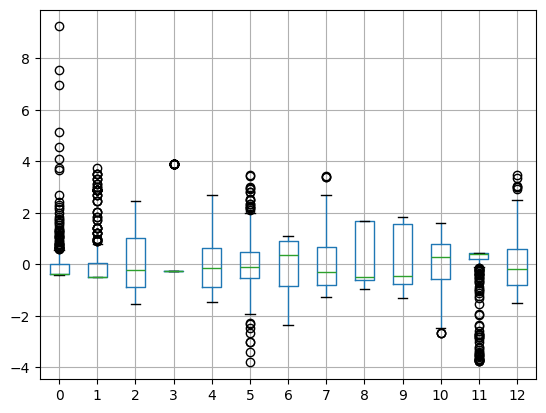

In [7]:
pd.DataFrame(X_train_scaled).boxplot()
plt.show()

In [8]:
# 활성화 함수 : 입력데이터를 적절하게 처리하여 출력데이터를 만들어내는 함수
# input data -> {activation function} -> output data

# 활성화 함수의 종류 : 탄젠트(thanh) 함수, 시그모이드(sigmoid) 함수, ReLU 함수

# 탄젠트 함수나 시그모이드 함수보다 학습시간이 빨라서 최근에는 ReLU(Rectified Linear Unit)가 많이 사용되고 있음

from keras import models, layers


# 64개의 노드를 가진 은닉층 2개의 신경망
def build_model():
    model = models.Sequential()

    # relu
    model.add(layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation="relu"))

    # 출력층(1개의 노드, 하나의 값을 예측하는 회귀분석의 경우 활성화 함수가 없는 선형층을 사용함)
    model.add(layers.Dense(1))

    # mse 손실 함수를 사용하여 컴파일
    # mse : 평균 제곱 오차(mean squared error) - 예측값과 실제값의 거리의 제곱
    # mae : 평균 절대 오차, 예측값과 실제값의 거리의 절대값
    # metrics 평가지표, 검증용 데이터셋으로 평가하는 기준
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model


model = build_model()
model.summary()

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

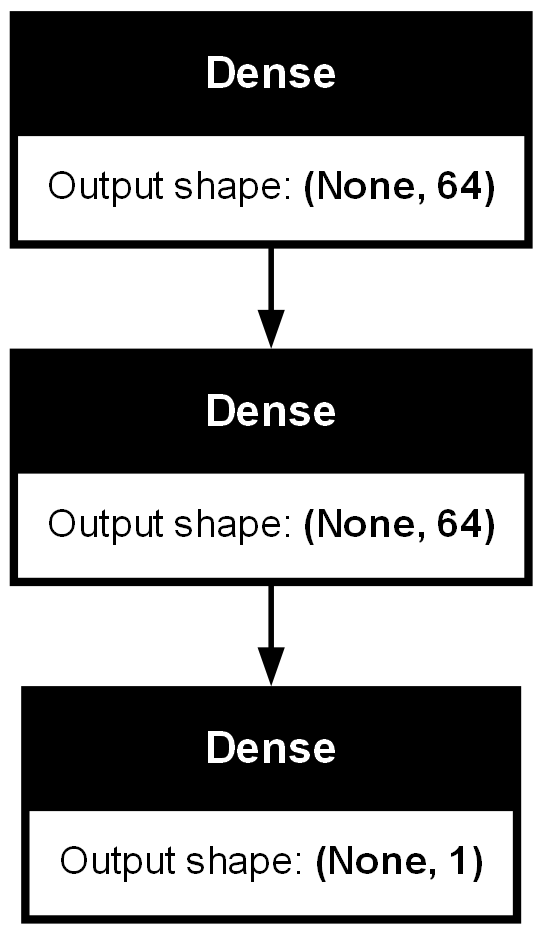

In [9]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

In [10]:
import matplotlib.pyplot as plt
import numpy as np


def train(x_train, y_train, epochs=21):
    for epoch in np.arange(1, epochs):
        hist = model.fit(x_train, y_train)
        plt.plot(y_train, c="r", label="real")
        plt.plot(model.predict(x_train), c="b", label="pred")
        plt.legend()
        mae = hist.history["mae"][0]
        plt.title(f"Epoch {epoch:02d}, mae {mae:.2f}")
        plt.savefig(f"img/plot_{epoch:02d}.png")
        plt.clf()

In [11]:
train(X_train_scaled,y_train)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 578.3464 - mae: 22.0802  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 483.8289 - mae: 19.9668
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 402.0142 - mae: 17.9860
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 302.9735 - mae: 15.3185
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 218.5352 - mae: 12.7694
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 172.6993 - mae: 10.5184
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 91.6625 - mae: 7.6906
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 75.5281 - mae: 6.6182
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 52.2927 - mae: 5.5719
13/13 ━━━━━━━━━━━━━━━━

In [12]:
# !pip install opencv-python

import cv2
import glob


img_array = []
size = (0, 0)

for filename in sorted(glob.glob("img/*.png")):
    img = cv2.imread(filename)  # 이미지 로드
    height, width, layers = img.shape
    size = (width, height)
    img_array.append(img)

out = cv2.VideoWriter("model.mp4", cv2.VideoWriter_fourcc(*"H264"), 0.5, size)

for i in range(len(img_array)):
    out.write(img_array[i])

out.release()

In [13]:
hist = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 15.1942 - mae: 2.7262
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 13.2564 - mae: 2.6349
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 16.1364 - mae: 2.7797
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 15.0748 - mae: 2.7139
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 13.5765 - mae: 2.6241
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 10.9317 - mae: 2.4404
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 11.2168 - mae: 2.3825
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 11.7950 - mae: 2.4918
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 10.4723 - mae: 2.4006
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 13.2735 - mae: 2.4865
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 10.6461 - mae: 2.3770
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 11.3887 - mae: 2.4726
Epoch 13/100
7/7 ━━━━━━━━

In [14]:
# 검증용 데이터로 모델 평가
mse, mae = model.evaluate(X_test_scaled, y_test, verbose=1)

print(mse)  # 평균제곱오차
print(mae)  # 평균절대오차

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.4249 - mae: 2.5187
38.834808349609375
2.7107324600219727


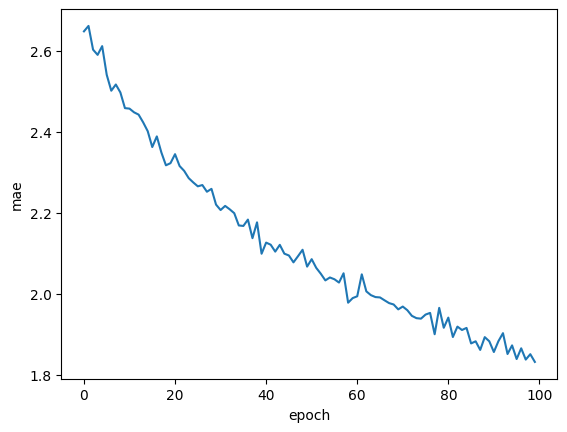

In [15]:
plt.plot(hist.history["mae"])
plt.ylabel("mae")
plt.xlabel("epoch")

plt.show()